# Note: Product Descriptionis the common column between import sheet and data bank sheet.

# Objective – model number and brand name columns are required in import sheet.Create a column where % match (eg 100% or 50%, etc.) between product description column of both table is represented with their percentage match.

# Task 1 – Return Brand Name and Model Name in import table from Data bank table where product description of import file is 100% match with product description of Data Bank.

# Task 2 - Return Brand Name and Model name column in import table from Data bank table where product description of import file is up to 90% match with product description of Data Bank. (Consider only those product descriptions of import table for which Brand Name and Model name column is not returned in task 1).

# Task 3 - Use Column 'Shipper Name' to find the brand name for rest of the rows


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing the Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

# Importing the Dataset

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Fuzzy Cleaning/Fuzzy Cleaning/import.xlsx')
df.head()

,slno,Date,HS Code,Product Description,Consignee Name,Shipper Name,Consignee Address 1,Consignee Address 2,Shipper Address1,Shipper Address 2,Standard Qty,Standard Unit,Standard Unit Rate $,Tax %,Estimated CIF Value $,Unit Rate $,Port of Destination,Country of Origin,QTY,Unit,Rate In FC,Rate Currency,Tax $,Landed Value $,Month,HS2,HS4,Consignee City,Consignee Pincode,Consignee State,Consignee Phone,Consignee E-mail,Contact Person,Shipper City,Shipper Country,Notify Party,BL TYP,Shipment Mode,Port Of Origin,HS Description,Raw Consignee Name,Raw Shipper Name,Raw Consignee Add1,Raw Consignee Add2,Raw Shipper Address1,Raw Shipper Address2,Raw Consignee City,Raw Consignee Pincode,Raw Consignee State,Raw Consignee Phone,Raw Consignee E-mail,Record Id
0,0,2023-06-01,85258900,M320 IVCIII CAMERA - 4K 10449087 SPARE PARTS ...,DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",NaN,ERNST-LEITZ-STRASSE 17-3735578 WETZLAR / DUETS...,NaN,1,NOS,2101.580,30.979997,2101.58,2101.58,Jnpt,Singapore,1,PCS,1928.67,EUR,639.33,2740.91,Jun-2023,85,8525,DELHI,110015.0,DELHI,NaN,amit.jain@danaher.com,JAI SHANKAR KRISHNAN,NaN,NaN,NaN,HC,Sea,Not Available,"Transmission apparatus for radio-telephony, ra...",DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",NaN,ERNST-LEITZ-STRASSE 17-3735578 WETZLAR,NaN,DELHI,110015.0,DELHI,NaN,amit.jain@danaher.com,41162905
1,1,2023-06-01,85258900,16759732 FUJIFILM DIGITAL CAMERA F X-T30 II B/...,FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...",NaN,"26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",NaN,2,NOS,505.000,18.000016,1010.00,505.00,Bombay Air,China,2,NOS,40906.00,INR,178.53,1188.53,Jun-2023,85,8525,NEW DELHI,110037.0,DELHI,NaN,amit.kumar@fujifilm.com,MASAKI ZENKO,NaN,NaN,NaN,HC,Air,Not Available,"Transmission apparatus for radio-telephony, ra...",FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...",NaN,"26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",NaN,NEW DELHI,110037.0,DELHI,NaN,amit.kumar@fujifilm.com,40910267
2,2,2023-06-01,85258900,16670041 FUJIFILM DIGITAL CAMERA F X-S10 CD LI...,FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...",NaN,"26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",NaN,12,NOS,505.000,17.999998,6060.00,505.00,Bombay Air,China,12,NOS,40906.00,INR,1090.80,7150.80,Jun-2023,85,8525,NEW DELHI,110037.0,DELHI,NaN,amit.kumar@fujifilm.com,MASAKI ZENKO,NaN,NaN,NaN,HC,Air,Not Available,"Transmission apparatus for radio-telephony, ra...",FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...",NaN,"26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",NaN,NEW DELHI,110037.0,DELHI,NaN,amit.kumar@fujifilm.com,40910266
3,3,2023-06-01,85258900,M320 IVCIII CAMERA - 4K 10449087 SPARE PARTS ...,DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",NaN,ERNST-LEITZ-STRASSE 17-3735578 WETZLAR / DUETS...,NaN,1,NOS,2101.580,30.979997,2101.58,2101.58,Jnpt,Singapore,1,PCS,1928.67,EUR,639.33,2740.91,Jun-2023,85,8525,DELHI,110015.0,DELHI,NaN,amit.jain@danaher.com,JAI SHANKAR KRISHNAN,NaN,NaN,NaN,HC,Sea,Not Available,"Transmission apparatus for radio-telephony, ra...",DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",NaN,ERNST-LEITZ-STRASSE 17-3735578 WETZLAR,NaN,DELHI,110015.0,DELHI,NaN,amit.jain@danaher.com,41162884
4,4,2023-06-01,85258900,16670041 FUJIFILM DIGITAL CAMERA F X-S10 CD LI...,FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...",NaN,"26-30, NISHIAZABU 2-CHOME MINATO-KUTOKYO 106-8...",NaN,12,NOS,501.147,17.999991,6013.76,501.15,Delhi Air,China,12,NOS,40906.00,INR,1082.47,7096.23,Jun-2023,8

# Basic Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   slno                   1547 non-null   int64         
 1   Date                   1547 non-null   datetime64[ns]
 2   HS Code                1547 non-null   int64         
 3   Product Description    1547 non-null   object        
 4   Consignee Name         1547 non-null   object        
 5   Shipper Name           1547 non-null   object        
 6   Consignee Address 1    1539 non-null   object        
 7   Consignee Address 2    0 non-null      float64       
 8   Shipper Address1       1547 non-null   object        
 9   Shipper Address 2      0 non-null      float64       
 10  Standard Qty           1547 non-null   int64         
 11  Standard Unit          1547 non-null   object        
 12  Standard Unit Rate $   1547 non-null   float64       
 13  Tax

In [5]:
df.columns

Index(['slno', 'Date', 'HS Code', 'Product Description', 'Consignee Name',
       'Shipper Name', 'Consignee Address 1 ', 'Consignee Address 2',
       'Shipper Address1 ', 'Shipper Address 2 ', 'Standard Qty',
       'Standard Unit', 'Standard Unit Rate $', 'Tax %',
       'Estimated CIF Value $', 'Unit Rate $', 'Port of Destination',
       'Country of Origin', 'QTY', 'Unit', 'Rate In FC', 'Rate Currency',
       'Tax $', 'Landed Value $', 'Month', 'HS2', 'HS4', 'Consignee City',
       'Consignee Pincode', 'Consignee State', 'Consignee Phone',
       'Consignee E-mail', 'Contact Person', 'Shipper City', 'Shipper Country',
       'Notify Party', 'BL TYP', 'Shipment Mode', 'Port Of Origin',
       'HS Description', 'Raw Consignee Name', 'Raw Shipper Name',
       'Raw Consignee Add1', 'Raw Consignee Add2', 'Raw Shipper Address1',
       'Raw Shipper Address2', 'Raw Consignee City', 'Raw Consignee Pincode',
       'Raw Consignee State', 'Raw Consignee Phone', 'Raw Consignee E-mail',
  

In [6]:
df.shape

(1547, 52)

In [7]:
df.isnull().sum()

slno                        0
Date                        0
HS Code                     0
Product Description         0
Consignee Name              0
Shipper Name                0
Consignee Address 1         8
Consignee Address 2      1547
Shipper Address1            0
Shipper Address 2        1547
Standard Qty                0
Standard Unit               0
Standard Unit Rate $        0
Tax %                       0
Estimated CIF Value $       0
Unit Rate $                 0
Port of Destination         0
Country of Origin           0
QTY                         0
Unit                        0
Rate In FC                  0
Rate Currency               0
Tax $                       0
Landed Value $              0
Month                       0
HS2                         0
HS4                         0
Consignee City              8
Consignee Pincode           8
Consignee State             8
Consignee Phone          1157
Consignee E-mail            8
Contact Person              8
Shipper Ci

In [8]:
df.describe()

,slno,HS Code,Consignee Address 2,Shipper Address 2,Standard Qty,Standard Unit Rate $,Tax %,Estimated CIF Value $,Unit Rate $,QTY,Rate In FC,Tax $,Landed Value $,HS2,HS4,Consignee Pincode,Consignee Phone,Shipper City,Shipper Country,Notify Party,Raw Consignee Add2,Raw Shipper Address2,Raw Consignee Pincode,Raw Consignee Phone,Record Id
count,1547.000000,1.547000e+03,0.0,0.0,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1.547000e+03,1547.000000,1547.000000,1547.000000,1547.000000,1539.000000,3.900000e+02,0.0,0.0,0.0,0.0,0.0,1539.000000,3.900000e+02,1.547000e+03
mean,773.000000,8.806635e+07,NaN,NaN,19.089851,1049.821277,25.873001,12393.042314,1049.821739,19.089851,6.502618e+04,2642.424984,15035.467298,87.947641,8806.204913,146582.625081,9.199495e+11,NaN,NaN,NaN,NaN,NaN,146582.625081,9.199495e+11,4.231637e+07
std,446.724747,2.343376e+06,NaN,NaN,51.903100,2380.501130,6.615219,30887.373846,2380.501151,51.903100,1.179738e+05,5994.172084,36765.196176,2.460392,234.721439,115020.252685,3.932390e+07,NaN,NaN,NaN,NaN,NaN,115020.252685,3.932390e+07,1.079276e+06
min,0.000000,8.525890e+07,NaN,NaN,1.000000,0.010000,17.999799,0.030000,0.010000,1.000000,1.000000e-02,0.010000,0.040000,85.000000,8525.000000,110001.000000,9.199117e+11,NaN,NaN,NaN,NaN,NaN,110001.000000,9.199117e+11,4.033071e+07
25%,386.500000,8.525890e+07,NaN,NaN,1.000000,172.165000,18.000002,595.265000,172.165000,1.000000,8.874000e+02,144.850000,747.920000,85.000000,8525.000000,110044.000000,9.199117e+11,NaN,NaN,NaN,NaN,NaN,110044.000000,9.199117e+11,4.159283e+07
50%,773.000000,9.002110e+07,NaN,NaN,4.000000,495.620000,30.979907,2339.820000,495.620000,4.000000,3.119136e+04,549.140000,2869.140000,90.000000,9002.000000,110044.000000,9.199117e+11,NaN,NaN,NaN,NaN,NaN,110044.000000,9.199117e+11,4.218363e+07
75%,1159.500000,9.002110e+07,NaN,NaN,13.000000,1120.912000,30.980006,9004.260000,1120.915000,13.000000,8.434238e+04,2164.810000,11384.780000,90.000000,9002.000000,122001.000000,9.199903e+11,NaN,NaN,NaN,NaN,NaN,122001.000000,9.199903e+11,4.316026e+07
max,1546.000000,9.002110e+07,NaN,NaN,1002.000000,31934.125000,43.993295,396224.420000,31934.130000,1002.000000,2.276774e+06,71192.000000,467416.420000,90.000000,9002.000000,670004.000000,9.199903e+11,NaN,NaN,NaN,NaN,NaN,670004.000000,9.199903e+11,4.437611e+07


# Cleaning the Dataset

In [9]:
# dropping the columns with more than 70% of missing values

df.drop(['Consignee Address 2', 'Shipper Address 2 ', 'Consignee Phone','Shipper City','Shipper Country','Notify Party',
        'Raw Consignee Add2','Raw Shipper Address2', 'Raw Consignee Phone'], axis=1, inplace = True)
print(df.isnull().sum())
print(df.shape)

slno                     0
Date                     0
HS Code                  0
Product Description      0
Consignee Name           0
Shipper Name             0
Consignee Address 1      8
Shipper Address1         0
Standard Qty             0
Standard Unit            0
Standard Unit Rate $     0
Tax %                    0
Estimated CIF Value $    0
Unit Rate $              0
Port of Destination      0
Country of Origin        0
QTY                      0
Unit                     0
Rate In FC               0
Rate Currency            0
Tax $                    0
Landed Value $           0
Month                    0
HS2                      0
HS4                      0
Consignee City           8
Consignee Pincode        8
Consignee State          8
Consignee E-mail         8
Contact Person           8
BL TYP                   0
Shipment Mode            0
Port Of Origin           0
HS Description           0
Raw Consignee Name       0
Raw Shipper Name         0
Raw Consignee Add1       8
R

In [10]:
# converting all the strings to upper case, for uniformaty

df = df.applymap(lambda x: x.upper() if type(x) == str else x)
df.head(2)

,slno,Date,HS Code,Product Description,Consignee Name,Shipper Name,Consignee Address 1,Shipper Address1,Standard Qty,Standard Unit,Standard Unit Rate $,Tax %,Estimated CIF Value $,Unit Rate $,Port of Destination,Country of Origin,QTY,Unit,Rate In FC,Rate Currency,Tax $,Landed Value $,Month,HS2,HS4,Consignee City,Consignee Pincode,Consignee State,Consignee E-mail,Contact Person,BL TYP,Shipment Mode,Port Of Origin,HS Description,Raw Consignee Name,Raw Shipper Name,Raw Consignee Add1,Raw Shipper Address1,Raw Consignee City,Raw Consignee Pincode,Raw Consignee State,Raw Consignee E-mail,Record Id
0,0,2023-06-01,85258900,M320 IVCIII CAMERA - 4K 10449087 SPARE PARTS ...,DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR / DUETS...,1,NOS,2101.58,30.979997,2101.58,2101.58,JNPT,SINGAPORE,1,PCS,1928.67,EUR,639.33,2740.91,JUN-2023,85,8525,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,JAI SHANKAR KRISHNAN,HC,SEA,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,41162905
1,1,2023-06-01,85258900,16759732 FUJIFILM DIGITAL CAMERA F X-T30 II B/...,FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",2,NOS,505.00,18.000016,1010.00,505.00,BOMBAY AIR,CHINA,2,NOS,40906.00,INR,178.53,1188.53,JUN-2023,85,8525,NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,MASAKI ZENKO,HC,AIR,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,40910267


In [11]:
# These columns hold no significant numerical value, so converting them in strings

columns_to_convert = ['slno','HS Code','Raw Consignee Pincode','Record Id']

df[columns_to_convert] = df[columns_to_convert].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   slno                   1547 non-null   object        
 1   Date                   1547 non-null   datetime64[ns]
 2   HS Code                1547 non-null   object        
 3   Product Description    1547 non-null   object        
 4   Consignee Name         1547 non-null   object        
 5   Shipper Name           1547 non-null   object        
 6   Consignee Address 1    1539 non-null   object        
 7   Shipper Address1       1547 non-null   object        
 8   Standard Qty           1547 non-null   int64         
 9   Standard Unit          1547 non-null   object        
 10  Standard Unit Rate $   1547 non-null   float64       
 11  Tax %                  1547 non-null   float64       
 12  Estimated CIF Value $  1547 non-null   float64       
 13  Uni

In [12]:
# the 8 remaining values have a common country of origin
# instead of taking mode of the whole dataset to fill these values, mode of germany_df will be more accurate

germany_df = df.loc[df["Country of Origin"]=="GERMANY"]
germany_df

,slno,Date,HS Code,Product Description,Consignee Name,Shipper Name,Consignee Address 1,Shipper Address1,Standard Qty,Standard Unit,Standard Unit Rate $,Tax %,Estimated CIF Value $,Unit Rate $,Port of Destination,Country of Origin,QTY,Unit,Rate In FC,Rate Currency,Tax $,Landed Value $,Month,HS2,HS4,Consignee City,Consignee Pincode,Consignee State,Consignee E-mail,Contact Person,BL TYP,Shipment Mode,Port Of Origin,HS Description,Raw Consignee Name,Raw Shipper Name,Raw Consignee Add1,Raw Shipper Address1,Raw Consignee City,Raw Consignee Pincode,Raw Consignee State,Raw Consignee E-mail,Record Id
13,13,2023-06-03,85258900,FLEXACAM C3 CAMERA 12730533 [ SPARE PARTS / AC...,DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR / DUETS...,1,NOS,1499.610,30.980040,1499.61,1499.61,BOMBAY AIR,GERMANY,1,NOS,1378.80,EUR,456.20,1955.81,JUN-2023,85,8525,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,JAI SHANKAR KRISHNAN,HC,AIR,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRABE 17-37 35578 WETZLAR GERMANY,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,41415897
14,14,2023-06-03,85258900,LEICA K3M 11547113 [ SPARE PARTS / ACCESSORIES...,DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR / DUETS...,1,NOS,2188.280,30.979983,2188.28,2188.28,BOMBAY AIR,GERMANY,1,NOS,2002.50,EUR,665.70,2853.98,JUN-2023,85,8525,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,JAI SHANKAR KRISHNAN,HC,AIR,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRABE 17-37 35578 WETZLAR GERMANY,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,41525557
247,247,2023-06-17,85258900,LEICA K3C 11547114 [6.3 MP COLOR CAMERA] SPAR...,DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR / DUETS...,1,NOS,1751.460,30.980009,1751.46,1751.46,BOMBAY AIR,GERMANY,1,NOS,1584.00,EUR,532.82,2284.28,JUN-2023,85,8525,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,JAI SHANKAR KRISHNAN,HC,AIR,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRABE 17-37 35578 WETZLAR GERMANY,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,42493647
248,248,2023-06-17,85258900,LEICA K3M 11547113 [ SPARE PARTS / ACCESSORIES...,DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR / DUETS...,1,NOS,2238.070,30.980024,2238.07,2238.07,BOMBAY AIR,GERMANY,1,NOS,2002.50,EUR,680.85,2918.92,JUN-2023,85,8525,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,JAI SHANKAR KRISHNAN,HC,AIR,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRABE 17-37 35578 WETZLAR GERMANY,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,42493621
334,334,2023-06-24,85258900,LEICA K8 CAMERA 11547116 [ SPARE PARTS / ACCES...,DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR / DUETS...,1,NOS,10300.630,30.980001,10300.63,10300.63,BOMBAY AIR,GERMANY,1,NOS,9404.55,EUR,3191.13,13491.76,JUN-2023,85,8525,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,JAI SHANKAR KRISHNAN,HC,AIR,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -

In [13]:
modes = germany_df.mode().iloc[0]

# fiiling missing values with the Germany_df modes
df['Consignee Address 1 '].fillna(modes['Consignee Address 1 '], inplace=True)
df['Consignee City'].fillna(modes['Consignee City'], inplace=True)
df['Consignee Pincode'].fillna(modes['Consignee Pincode'], inplace=True)
df['Consignee State'].fillna(modes['Consignee State'], inplace=True)
df['Consignee E-mail'].fillna(modes['Consignee E-mail'], inplace=True)
df['Contact Person'].fillna(modes['Contact Person'], inplace=True)
df['Raw Consignee Add1'].fillna(modes['Raw Consignee Add1'], inplace=True)
df['Raw Consignee City'].fillna(modes['Raw Consignee City'], inplace=True)
df['Raw Consignee State'].fillna(modes['Raw Consignee State'], inplace=True)
df['Raw Consignee E-mail'].fillna(modes['Raw Consignee E-mail'], inplace=True)


df.isnull().sum()

slno                     0
Date                     0
HS Code                  0
Product Description      0
Consignee Name           0
Shipper Name             0
Consignee Address 1      0
Shipper Address1         0
Standard Qty             0
Standard Unit            0
Standard Unit Rate $     0
Tax %                    0
Estimated CIF Value $    0
Unit Rate $              0
Port of Destination      0
Country of Origin        0
QTY                      0
Unit                     0
Rate In FC               0
Rate Currency            0
Tax $                    0
Landed Value $           0
Month                    0
HS2                      0
HS4                      0
Consignee City           0
Consignee Pincode        0
Consignee State          0
Consignee E-mail         0
Contact Person           0
BL TYP                   0
Shipment Mode            0
Port Of Origin           0
HS Description           0
Raw Consignee Name       0
Raw Shipper Name         0
Raw Consignee Add1       0
R

In [ ]:
# make rate in Fc column in USD like all the other columns and removing rate currency column

exchange_rates = {
    'INR': 0.011,
    'USD': 1.0,
    'EUR': 1.13,
    'JPY': 0.0071
}


df['Rate In FC'] = df.apply(lambda row: row['Rate In FC'] * exchange_rates[row['Rate Currency']], axis=1)

# dropping the Currency column
df.drop('Rate Currency', axis=1, inplace=True)

df.head(2)

# Basic EDA

Text(0, 0.5, 'Consignee Name')

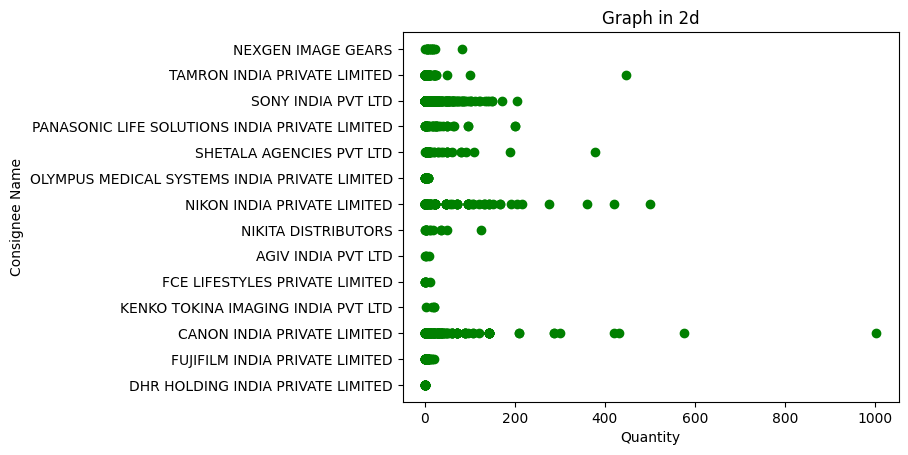

In [40]:
x=df['QTY']
y=df['Consignee Name']
plt.scatter(x,y,c="g")
plt.title("Graph in 2d")
plt.xlabel("Quantity")
plt.ylabel("Consignee Name")

cannon india leads in quantity, 1 possible outlier also detected

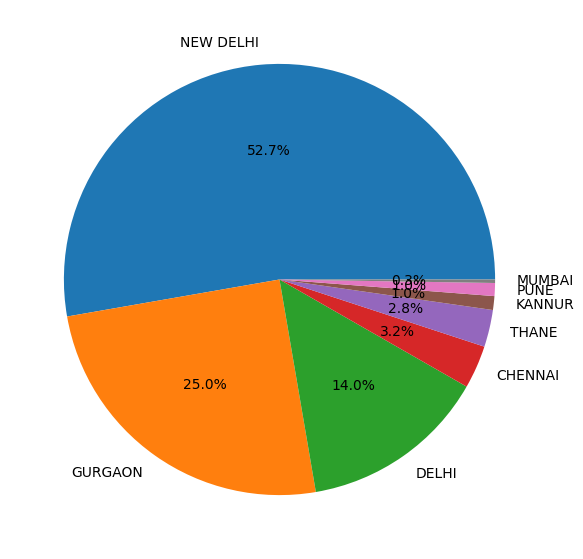

In [41]:
x2=list(df["Consignee City"].value_counts().keys())
y2=list(df["Consignee City"].value_counts())

plt.figure(figsize=(7,7))
plt.pie(y2,labels=x2,autopct='%0.1f%%')
plt.show()

Delhi Leads as Consignee City by Far.
note: Did not rename delhi to new delhi becuase of less business understanding. But it could have been done

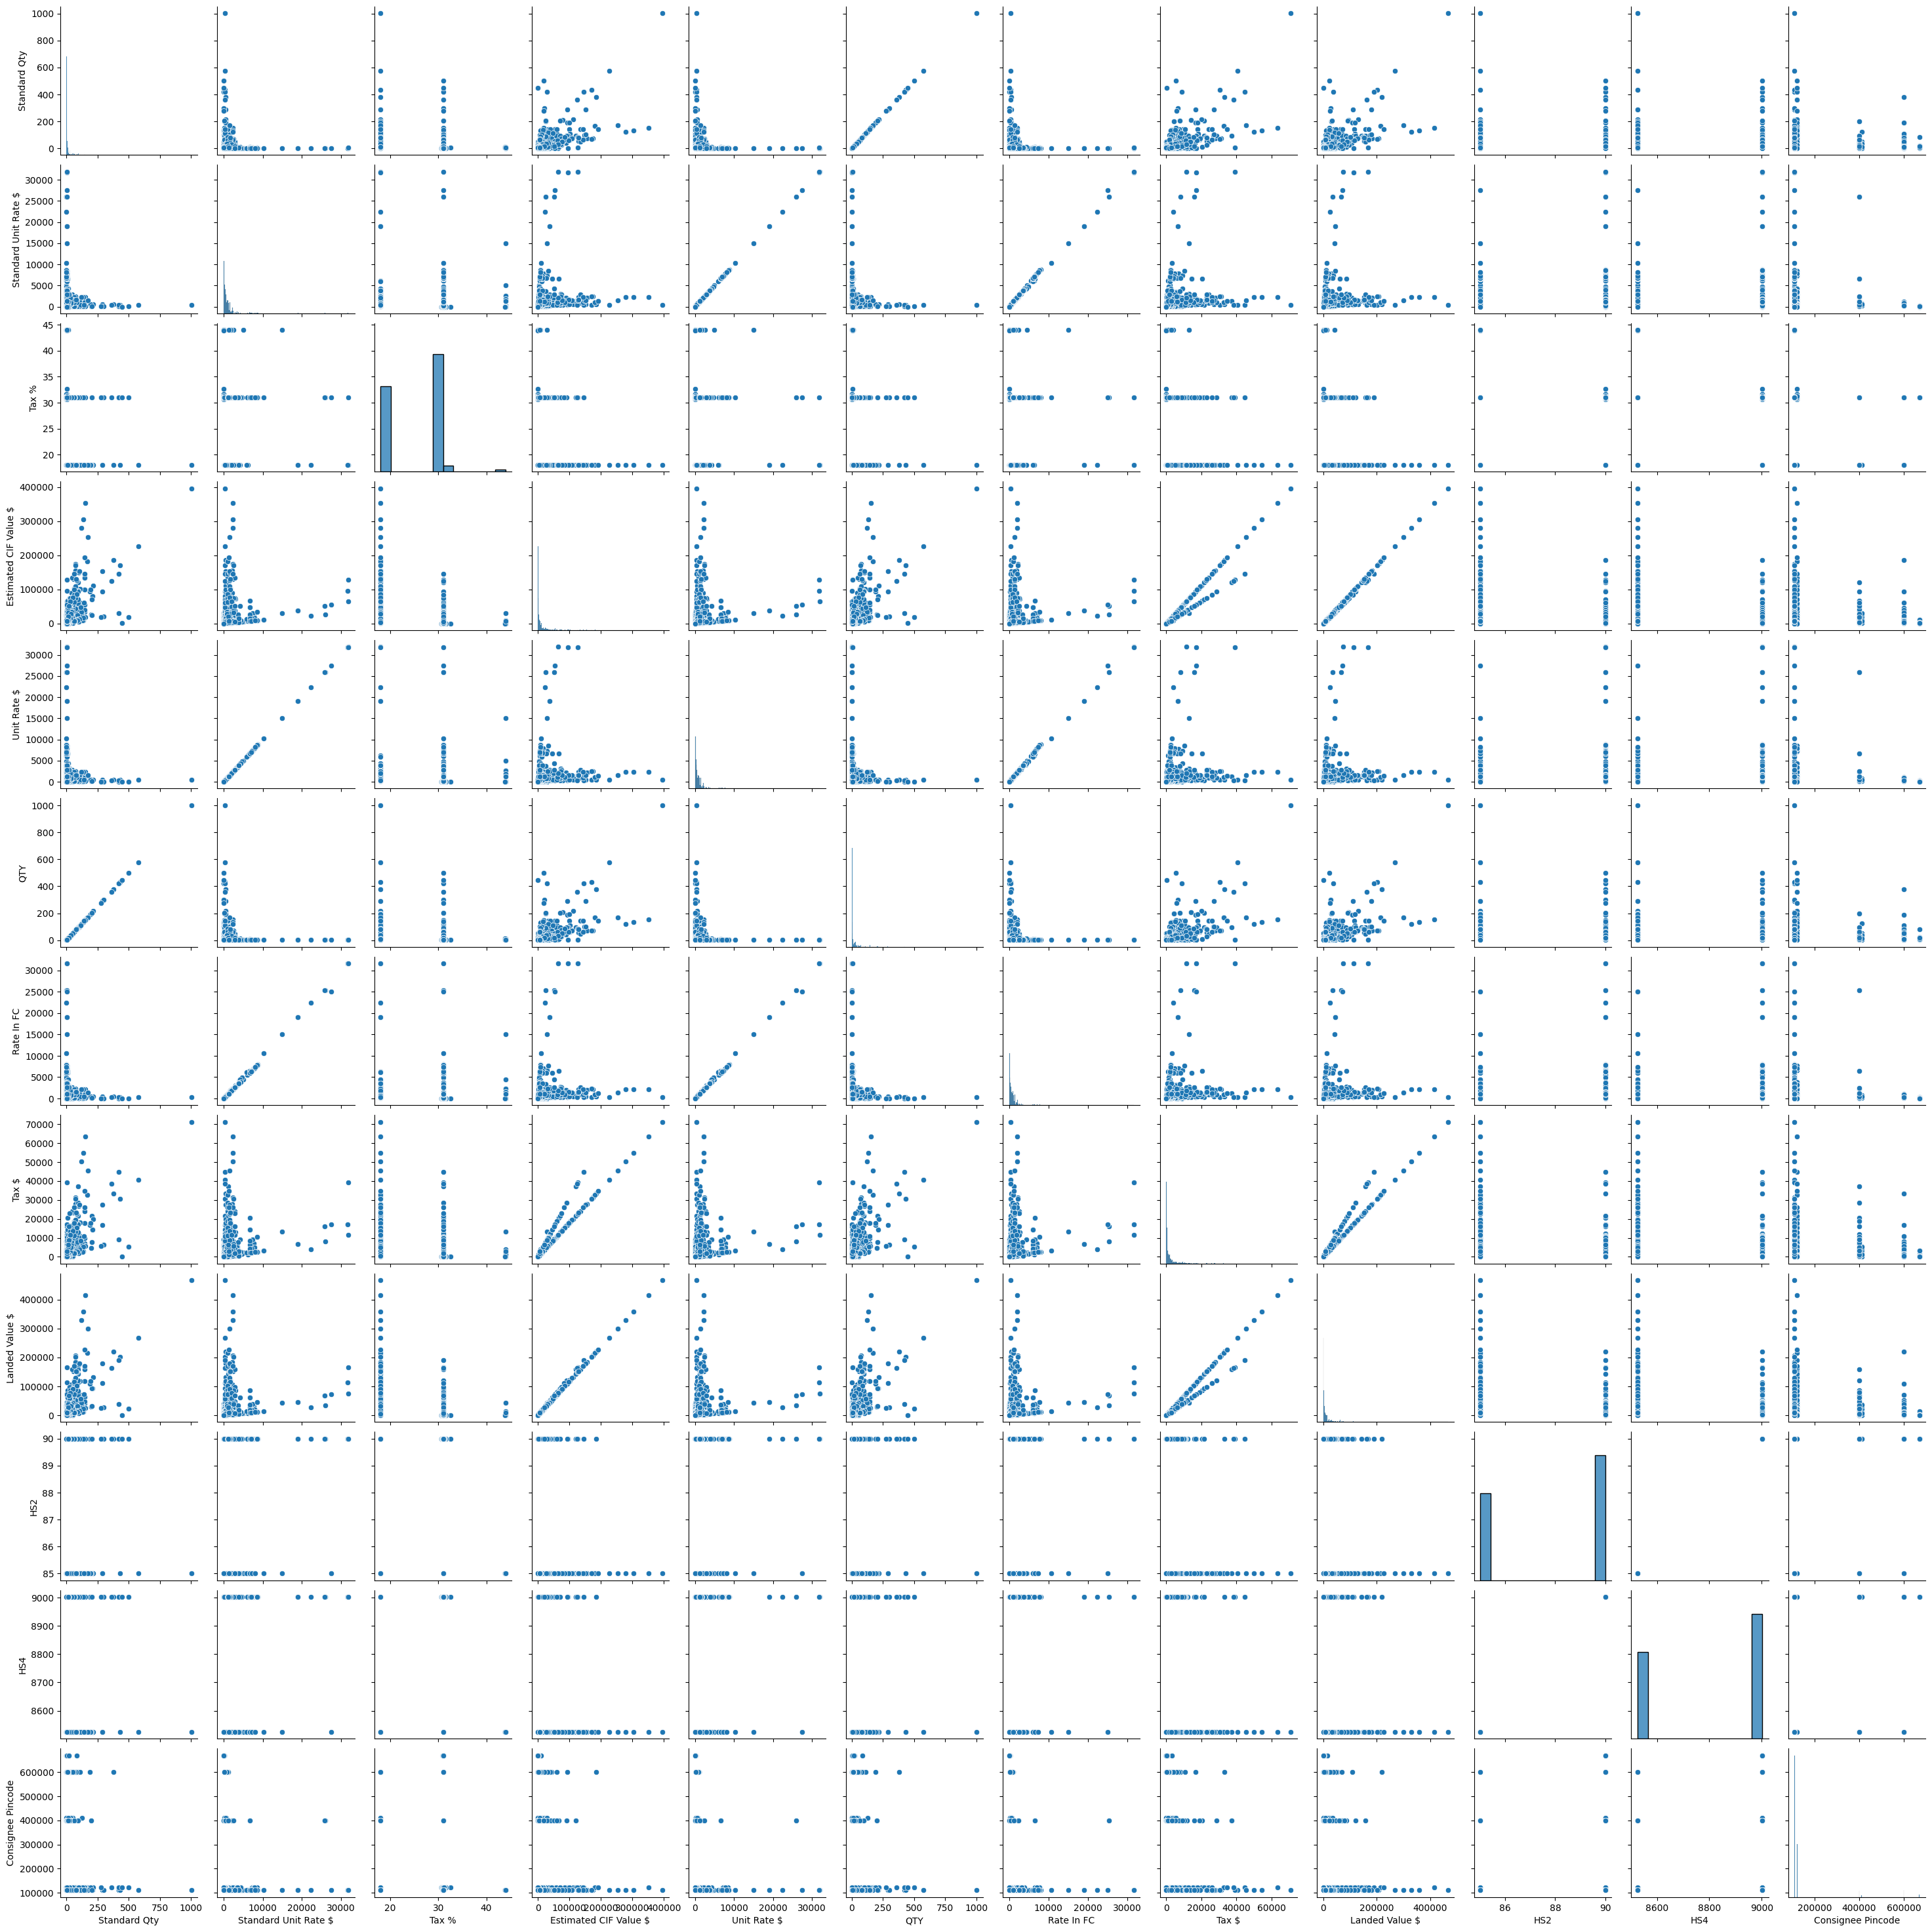

In [42]:
sns.pairplot(df)

<Axes: xlabel='Raw Consignee Name', ylabel='Landed Value $'>

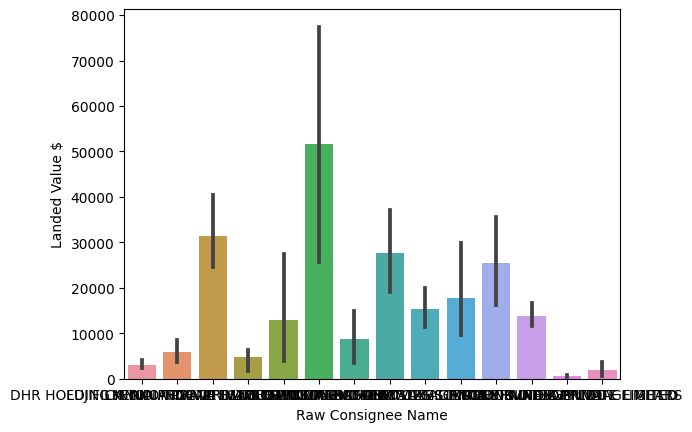

In [43]:
sns.barplot(x="Raw Consignee Name",y="Landed Value $",data=df)

<ipython-input-44-dfc896f12fa3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Landed Value $"])


<Axes: xlabel='Landed Value $', ylabel='Density'>

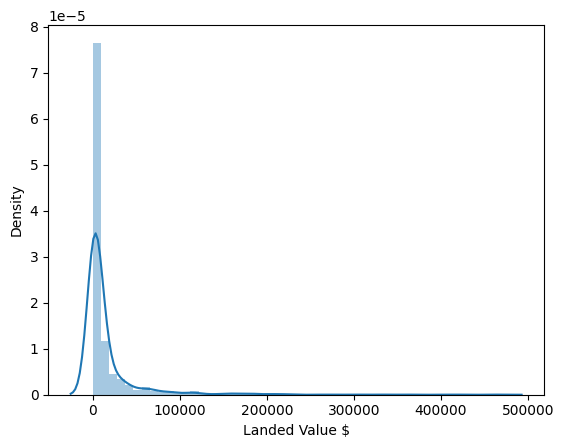

In [44]:
sns.distplot(df["Landed Value $"])

The data set is highly right skewed, reason could be the outler that we didnt remove

# reading dataset 'Data Bank'

In [15]:
# making strings in data bank capital for uniformity

data_bank = pd.read_excel('/content/drive/MyDrive/Fuzzy Cleaning/Fuzzy Cleaning/data bank.xlsx')
data_bank = data_bank.applymap(lambda x: x.upper() if type(x) == str else x)
data_bank.head(2)

,Product Description,Model Name,Brand Name
0,"1ST LENS ASSY (9147),A-2182-241-A,SEL1635GM(PA...",SEL1635GM,SONY
1,92992523 VPLL-Z4015/4WW SHORT FOCUS ZOOM LENS ...,VPLL-Z4015/4WW,SONY


# Using fuzzy wuzzy for string matching

## APPLYING CROSS JOIN:

In [17]:
import pandas as pd
from fuzzywuzzy import fuzz
from tqdm import tqdm

data_bank['Product Description'] = data_bank['Product Description'].astype(str).fillna('')


def get_similarity_score(s1, s2):
    return fuzz.ratio(s1, s2)

# calculating similarity scores for each combination of descriptions (or CROSS JOIN)
scores = []
for desc1 in tqdm(df['Product Description'], desc="Calculating Similarity"):
    for desc2 in data_bank['Product Description']:
        if desc1 != desc2:
            score = get_similarity_score(desc1, desc2)
            scores.append((desc1, desc2, score))

# Create a dataframe to display the similarity scores
result_df = pd.DataFrame(scores, columns=['Description1', 'Description2', 'Similarity Score'])
print(result_df)

In [20]:
# getting all the three columns
max_score_index = result_df.groupby('Description1')['Similarity Score'].idxmax()

max_scores_df = result_df.loc[max_score_index, ['Description1', 'Description2', 'Similarity Score']]

print(max_scores_df)


                                               Description1  \
3217266                    0570C003AA EF50MM F/1.8 STM LENS   
3116169        0571C003AA EF70-300MM F/4-5.6 IS II USM LENS   
24537842  072EE00A8300 A83 FRONT LENS ASSY PARTS FOR LEN...   
20977186                100MM F2.8 BLACK+SILVER CAMERA LENS   
1250890   1066C009AA POWERSHOT G7X MARKII BKO DIGICAM IN...   
...                                                     ...   
28499094  ZOOM LENS RP,A-2227-008-C,PXW-Z280V PARTS FOR ...   
23767658  ZV-1F/BC IN5 80819215 DIGITAL STILL CAMERA WW1...   
31119349  ZV-E10/BQ IN5 32852720 DIGITAL STILL CAMERA WW...   
30613512  ZV-E10L/BQ IN5 32852820 DIGITAL STILL CAMERA W...   
16182300  ZV-E10L/BQ IN5 32852820 DIGITAL STILL CAMERA W...   

                                               Description2  Similarity Score  
3217266                   0570C003AA EF50MM F/1.8 STM LENS                 98  
3116169       0571C003AA EF70-300MM F/4-5.6 IS II USM LENS                 99  
245

In [21]:
max_scores_df.head()

,Description1,Description2,Similarity Score
3217266,0570C003AA EF50MM F/1.8 STM LENS,0570C003AA EF50MM F/1.8 STM LENS,98
3116169,0571C003AA EF70-300MM F/4-5.6 IS II USM LENS,0571C003AA EF70-300MM F/4-5.6 IS II USM LENS,99
24537842,072EE00A8300 A83 FRONT LENS ASSY PARTS FOR LEN...,072EE00A8300 A83 FRONT LENS ASSY PARTS F...,91
20977186,100MM F2.8 BLACK+SILVER CAMERA LENS,50MM F0.95 BLACK+SILVER PHOTO CAMERA LENS,82
1250890,1066C009AA POWERSHOT G7X MARKII BKO DIGICAM IN...,1066C009AA POWERSHOT G7X MARKII BKO DIGICAM IN...,99


In [22]:
# renaiming for joining

max_scores_df.rename(columns={'Description1': 'Product Description'}, inplace=True)
data_bank.rename(columns={'Product Description': 'Description2'}, inplace=True)

In [23]:
# checking for duplicates

duplicates = data_bank.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4         True
         ...  
20230    False
20231    False
20232    False
20233    False
20234    False
Length: 20235, dtype: bool


In [24]:
print(data_bank['Description2'].duplicated().sum())

13074


In [25]:
# dropping duplicates before joining

data_bank_cleaned =  data_bank.drop_duplicates(subset=['Description2'])
print(data_bank_cleaned['Description2'].duplicated().sum())

0


In [26]:
# performing left join on 'import' dataset and our max score dataset

merged_1 = pd.merge(df, max_scores_df , on='Product Description', how='left')
merged_1

,slno,Date,HS Code,Product Description,Consignee Name,Shipper Name,Consignee Address 1,Shipper Address1,Standard Qty,Standard Unit,Standard Unit Rate $,Tax %,Estimated CIF Value $,Unit Rate $,Port of Destination,Country of Origin,QTY,Unit,Rate In FC,Tax $,Landed Value $,Month,HS2,HS4,Consignee City,Consignee Pincode,Consignee State,Consignee E-mail,Contact Person,BL TYP,Shipment Mode,Port Of Origin,HS Description,Raw Consignee Name,Raw Shipper Name,Raw Consignee Add1,Raw Shipper Address1,Raw Consignee City,Raw Consignee Pincode,Raw Consignee State,Raw Consignee E-mail,Record Id,Description2,Similarity Score
0,0,2023-06-01,85258900,M320 IVCIII CAMERA - 4K 10449087 SPARE PARTS ...,DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR / DUETS...,1,NOS,2101.580,30.979997,2101.58,2101.58,JNPT,SINGAPORE,1,PCS,2179.39710,639.33,2740.91,JUN-2023,85,8525,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,JAI SHANKAR KRISHNAN,HC,SEA,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,41162905,M320 IVCIII CAMERA - 4K 10449087 SPARE PARTS ...,99
1,1,2023-06-01,85258900,16759732 FUJIFILM DIGITAL CAMERA F X-T30 II B/...,FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",2,NOS,505.000,18.000016,1010.00,505.00,BOMBAY AIR,CHINA,2,NOS,449.96600,178.53,1188.53,JUN-2023,85,8525,NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,MASAKI ZENKO,HC,AIR,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,40910267,16759732 FUJIFILM DIGITAL CAMERA F X-T30 II B/...,98
2,2,2023-06-01,85258900,16670041 FUJIFILM DIGITAL CAMERA F X-S10 CD LI...,FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",12,NOS,505.000,17.999998,6060.00,505.00,BOMBAY AIR,CHINA,12,NOS,449.96600,1090.80,7150.80,JUN-2023,85,8525,NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,MASAKI ZENKO,HC,AIR,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,40910266,16670041 FUJIFILM DIGITAL CAMERA F X-S10 CD (L...,98
3,3,2023-06-01,85258900,M320 IVCIII CAMERA - 4K 10449087 SPARE PARTS ...,DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR / DUETS...,1,NOS,2101.580,30.979997,2101.58,2101.58,JNPT,SINGAPORE,1,PCS,2179.39710,639.33,2740.91,JUN-2023,85,8525,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,JAI SHANKAR KRISHNAN,HC,SEA,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,41162884,M320 IVCIII CAMERA - 4K 10449087 SPARE PARTS ...,99
4,4,2023-06-01,85258900,16670041 FUJIFILM DIGITAL CAMERA F X-S10 CD LI...,FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30, NISHIAZABU 2-CHOME MINATO-KUTOKYO 106-8...",12,NOS,501.147,17.999991,6013.76,501.15,DELHI AIR,CHINA,12,NOS,449.96600,1082.47,7096.23,JUN-2023,85,8525,NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,MASAKI ZENKO,HC,AIR,NOT AVAILABLE,"TR

In [27]:
# performing another left join to get everything we need

merged_2 = pd.merge(merged_1, data_bank_cleaned, on='Description2', how='left')
merged_2.head()

,slno,Date,HS Code,Product Description,Consignee Name,Shipper Name,Consignee Address 1,Shipper Address1,Standard Qty,Standard Unit,Standard Unit Rate $,Tax %,Estimated CIF Value $,Unit Rate $,Port of Destination,Country of Origin,QTY,Unit,Rate In FC,Tax $,Landed Value $,Month,HS2,HS4,Consignee City,Consignee Pincode,Consignee State,Consignee E-mail,Contact Person,BL TYP,Shipment Mode,Port Of Origin,HS Description,Raw Consignee Name,Raw Shipper Name,Raw Consignee Add1,Raw Shipper Address1,Raw Consignee City,Raw Consignee Pincode,Raw Consignee State,Raw Consignee E-mail,Record Id,Description2,Similarity Score,Model Name,Brand Name
0,0,2023-06-01,85258900,M320 IVCIII CAMERA - 4K 10449087 SPARE PARTS ...,DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR / DUETS...,1,NOS,2101.580,30.979997,2101.58,2101.58,JNPT,SINGAPORE,1,PCS,2179.3971,639.33,2740.91,JUN-2023,85,8525,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,JAI SHANKAR KRISHNAN,HC,SEA,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,41162905,M320 IVCIII CAMERA - 4K 10449087 SPARE PARTS ...,99,M320 IVCIII,LEICA
1,1,2023-06-01,85258900,16759732 FUJIFILM DIGITAL CAMERA F X-T30 II B/...,FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",2,NOS,505.000,18.000016,1010.00,505.00,BOMBAY AIR,CHINA,2,NOS,449.9660,178.53,1188.53,JUN-2023,85,8525,NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,MASAKI ZENKO,HC,AIR,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,40910267,16759732 FUJIFILM DIGITAL CAMERA F X-T30 II B/...,98,X-T30 II,FUJIFILM
2,2,2023-06-01,85258900,16670041 FUJIFILM DIGITAL CAMERA F X-S10 CD LI...,FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",12,NOS,505.000,17.999998,6060.00,505.00,BOMBAY AIR,CHINA,12,NOS,449.9660,1090.80,7150.80,JUN-2023,85,8525,NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,MASAKI ZENKO,HC,AIR,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,40910266,16670041 FUJIFILM DIGITAL CAMERA F X-S10 CD (L...,98,X-S10,FUJIFILM
3,3,2023-06-01,85258900,M320 IVCIII CAMERA - 4K 10449087 SPARE PARTS ...,DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR / DUETS...,1,NOS,2101.580,30.979997,2101.58,2101.58,JNPT,SINGAPORE,1,PCS,2179.3971,639.33,2740.91,JUN-2023,85,8525,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,JAI SHANKAR KRISHNAN,HC,SEA,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,41162884,M320 IVCIII CAMERA - 4K 10449087 SPARE PARTS ...,99,M320 IVCIII,LEICA
4,4,2023-06-01,85258900,16670041 FUJIFILM DIGITAL CAMERA F X-S10 CD LI...,FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30, NISHIAZABU 2-CHOME MINATO-KUTOKYO 106-8...",12,NOS,501.147,17.999991,6013.76,501.15,DELHI AIR,CHINA,12,NOS,449.9660,1082.47,7096.23,JUN-2023,85,8525,

In [28]:
merged_2.shape

(1547, 46)

In [29]:
# creating 4 new columns based on the similarity score

merged_2['Model Name (100% match)'] = merged_2['Model Name'].where(merged_2['Similarity Score'] == 100, None)
merged_2['Brand Name (100% match)'] = merged_2['Brand Name'].where(merged_2['Similarity Score'] == 100, None)

merged_2['Model Name (>90% match)'] = merged_2['Model Name'][(merged_2['Similarity Score'] >= 90) & (merged_2['Similarity Score'] < 100)]
merged_2['Brand Name (>90% match)'] = merged_2['Brand Name'][(merged_2['Similarity Score'] >= 90) & (merged_2['Similarity Score'] < 100)]

In [30]:
merged_2.head(2)

,slno,Date,HS Code,Product Description,Consignee Name,Shipper Name,Consignee Address 1,Shipper Address1,Standard Qty,Standard Unit,Standard Unit Rate $,Tax %,Estimated CIF Value $,Unit Rate $,Port of Destination,Country of Origin,QTY,Unit,Rate In FC,Tax $,Landed Value $,Month,HS2,HS4,Consignee City,Consignee Pincode,Consignee State,Consignee E-mail,Contact Person,BL TYP,Shipment Mode,Port Of Origin,HS Description,Raw Consignee Name,Raw Shipper Name,Raw Consignee Add1,Raw Shipper Address1,Raw Consignee City,Raw Consignee Pincode,Raw Consignee State,Raw Consignee E-mail,Record Id,Description2,Similarity Score,Model Name,Brand Name,Model Name (100% match),Brand Name (100% match),Model Name (>90% match),Brand Name (>90% match)
0,0,2023-06-01,85258900,M320 IVCIII CAMERA - 4K 10449087 SPARE PARTS ...,DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR / DUETS...,1,NOS,2101.58,30.979997,2101.58,2101.58,JNPT,SINGAPORE,1,PCS,2179.3971,639.33,2740.91,JUN-2023,85,8525,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,JAI SHANKAR KRISHNAN,HC,SEA,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,41162905,M320 IVCIII CAMERA - 4K 10449087 SPARE PARTS ...,99,M320 IVCIII,LEICA,None,None,M320 IVCIII,LEICA
1,1,2023-06-01,85258900,16759732 FUJIFILM DIGITAL CAMERA F X-T30 II B/...,FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",2,NOS,505.00,18.000016,1010.00,505.00,BOMBAY AIR,CHINA,2,NOS,449.9660,178.53,1188.53,JUN-2023,85,8525,NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,MASAKI ZENKO,HC,AIR,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,40910267,16759732 FUJIFILM DIGITAL CAMERA F X-T30 II B/...,98,X-T30 II,FUJIFILM,None,None,X-T30 II,FUJIFILM


In [33]:
# Creating 1 more column

merged_2['Model Name (<90% match)'] = merged_2['Shipper Name'].str.split().str[0].where(merged_2['Similarity Score'] < 90, None)

In [34]:
merged_2.head()

,slno,Date,HS Code,Product Description,Consignee Name,Shipper Name,Consignee Address 1,Shipper Address1,Standard Qty,Standard Unit,Standard Unit Rate $,Tax %,Estimated CIF Value $,Unit Rate $,Port of Destination,Country of Origin,QTY,Unit,Rate In FC,Tax $,Landed Value $,Month,HS2,HS4,Consignee City,Consignee Pincode,Consignee State,Consignee E-mail,Contact Person,BL TYP,Shipment Mode,Port Of Origin,HS Description,Raw Consignee Name,Raw Shipper Name,Raw Consignee Add1,Raw Shipper Address1,Raw Consignee City,Raw Consignee Pincode,Raw Consignee State,Raw Consignee E-mail,Record Id,Description2,Similarity Score,Model Name,Brand Name,Model Name (100% match),Brand Name (100% match),Model Name (>90% match),Brand Name (>90% match),Model Name (<90% match)
0,0,2023-06-01,85258900,M320 IVCIII CAMERA - 4K 10449087 SPARE PARTS ...,DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR / DUETS...,1,NOS,2101.580,30.979997,2101.58,2101.58,JNPT,SINGAPORE,1,PCS,2179.3971,639.33,2740.91,JUN-2023,85,8525,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,JAI SHANKAR KRISHNAN,HC,SEA,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,41162905,M320 IVCIII CAMERA - 4K 10449087 SPARE PARTS ...,99,M320 IVCIII,LEICA,None,None,M320 IVCIII,LEICA,None
1,1,2023-06-01,85258900,16759732 FUJIFILM DIGITAL CAMERA F X-T30 II B/...,FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",2,NOS,505.000,18.000016,1010.00,505.00,BOMBAY AIR,CHINA,2,NOS,449.9660,178.53,1188.53,JUN-2023,85,8525,NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,MASAKI ZENKO,HC,AIR,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,40910267,16759732 FUJIFILM DIGITAL CAMERA F X-T30 II B/...,98,X-T30 II,FUJIFILM,None,None,X-T30 II,FUJIFILM,None
2,2,2023-06-01,85258900,16670041 FUJIFILM DIGITAL CAMERA F X-S10 CD LI...,FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",12,NOS,505.000,17.999998,6060.00,505.00,BOMBAY AIR,CHINA,12,NOS,449.9660,1090.80,7150.80,JUN-2023,85,8525,NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,MASAKI ZENKO,HC,AIR,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,40910266,16670041 FUJIFILM DIGITAL CAMERA F X-S10 CD (L...,98,X-S10,FUJIFILM,None,None,X-S10,FUJIFILM,None
3,3,2023-06-01,85258900,M320 IVCIII CAMERA - 4K 10449087 SPARE PARTS ...,DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR / DUETS...,1,NOS,2101.580,30.979997,2101.58,2101.58,JNPT,SINGAPORE,1,PCS,2179.3971,639.33,2740.91,JUN-2023,85,8525,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,JAI SHANKAR KRISHNAN,HC,SEA,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",DHR HOLDING INDIA PRIVATE LIMITED,LEICA MIKROSYSTEME VERTRIEB GMBH -DSA,"UNIT NO 325 TO 328 DLF TOWERS,SHIV AJI MARG",ERNST-LEITZ-STRASSE 17-3735578 WETZLAR,DELHI,110015.0,DELHI,AMIT.JAIN@DANAHER.COM,41162884,M320 IVCIII CAMERA - 4K 10449087 SPARE PARTS ...,99,M320 IVCIII,LEICA,None,None,M320 IVCIII,LEICA,None
4,4,2023-06-01,85258900,16670041 FUJIFILM DIGITAL CAMERA F X-S10 CD LI...,FUJIFILM IND

# checking

In [36]:
merged_2.loc[merged_2['Similarity Score']==100].head(2)

,slno,Date,HS Code,Product Description,Consignee Name,Shipper Name,Consignee Address 1,Shipper Address1,Standard Qty,Standard Unit,Standard Unit Rate $,Tax %,Estimated CIF Value $,Unit Rate $,Port of Destination,Country of Origin,QTY,Unit,Rate In FC,Tax $,Landed Value $,Month,HS2,HS4,Consignee City,Consignee Pincode,Consignee State,Consignee E-mail,Contact Person,BL TYP,Shipment Mode,Port Of Origin,HS Description,Raw Consignee Name,Raw Shipper Name,Raw Consignee Add1,Raw Shipper Address1,Raw Consignee City,Raw Consignee Pincode,Raw Consignee State,Raw Consignee E-mail,Record Id,Description2,Similarity Score,Model Name,Brand Name,Model Name (100% match),Brand Name (100% match),Model Name (>90% match),Brand Name (>90% match),Model Name (<90% match)
7,7,2023-06-01,85258900,16759768 FUJIFILM DIGITAL CAMERA F X-T30 II S/...,FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30, NISHIAZABU 2-CHOME MINATO-KUTOKYO 106-8...",4,NOS,501.145,18.000011,2004.58,501.15,DELHI AIR,CHINA,4,NOS,449.966,354.32,2358.90,JUN-2023,85,8525,NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,MASAKI ZENKO,HC,AIR,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30, NISHIAZABU 2-CHOME MINATO-KUTOKYO 106-8...",NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,41654248,16759768 FUJIFILM DIGITAL CAMERA F X-T30 II S/...,100,X-T30 II,FUJIFILM,X-T30 II,FUJIFILM,NaN,NaN,None
9,9,2023-06-01,85258900,16759768 FUJIFILM DIGITAL CAMERA F X-T30 II S/...,FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",4,NOS,505.000,18.000017,2020.00,505.00,BOMBAY AIR,CHINA,4,NOS,449.966,357.04,2377.04,JUN-2023,85,8525,NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,MASAKI ZENKO,HC,AIR,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30 NASHIAZABU,2 CHOME MINATO -KUTOKYO JAPAN...",NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,40910268,16759768 FUJIFILM DIGITAL CAMERA F X-T30 II S/...,100,X-T30 II,FUJIFILM,X-T30 II,FUJIFILM,NaN,NaN,None


In [37]:
merged_2.loc[merged_2['Similarity Score']==95].head(2)

,slno,Date,HS Code,Product Description,Consignee Name,Shipper Name,Consignee Address 1,Shipper Address1,Standard Qty,Standard Unit,Standard Unit Rate $,Tax %,Estimated CIF Value $,Unit Rate $,Port of Destination,Country of Origin,QTY,Unit,Rate In FC,Tax $,Landed Value $,Month,HS2,HS4,Consignee City,Consignee Pincode,Consignee State,Consignee E-mail,Contact Person,BL TYP,Shipment Mode,Port Of Origin,HS Description,Raw Consignee Name,Raw Shipper Name,Raw Consignee Add1,Raw Shipper Address1,Raw Consignee City,Raw Consignee Pincode,Raw Consignee State,Raw Consignee E-mail,Record Id,Description2,Similarity Score,Model Name,Brand Name,Model Name (100% match),Brand Name (100% match),Model Name (>90% match),Brand Name (>90% match),Model Name (<90% match)
36,36,2023-06-07,85258900,2729C008AA EOS 1500D KIT W EF-S18-55MM F/3.5-5...,CANON INDIA PRIVATE LIMITED,CANON SINGAPORE PTE LTD,"UNIT NO. 214-218 2ND FLR,NARAIN MA NZIL, B.K. ...","(SUPPLY CHAIN MGMT DIVISION) 1,FUSIONOPOLIS PL...",288,NOS,325.681,18.0,93796.12,325.68,DELHI AIR,TAIWAN,288,NOS,297.286,16883.31,110679.43,JUN-2023,85,8525,DELHI,110001.0,DELHI,CIPLINBOUND@CANON.CO.IN,KAZUTADA KOBAYASHI,HC,AIR,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",CANON INDIA PRIVATE LIMITED,CANON SINGAPORE PTE LTD,"UNIT NO. 214-218 2ND FLR,NARAIN MA NZIL, B.K. ...","(SUPPLY CHAIN MGMT DIVISION) 1,FUSIONOPOLIS PL...",DELHI,110001.0,DELHI,CIPLINBOUND@CANON.CO.IN,41026171,2729C008AA EOS 1500D KIT (W) (EF-S18-55MM F/3....,95,EOS 1500D,CANON,None,None,EOS 1500D,CANON,None
45,45,2023-06-07,85258900,2729C008AA EOS 1500D KIT W EF-S18-55MM F/3.5-5...,CANON INDIA PRIVATE LIMITED,CANON SINGAPORE PTE LTD,"UNIT NO. 214-218 2ND FLR,NARAIN MA NZIL, B.K. ...","(SUPPLY CHAIN MGMT DIVISION) 1,FUSIONOPOLIS PL...",72,NOS,325.681,18.0,23449.03,325.68,DELHI AIR,TAIWAN,72,NOS,297.286,4220.83,27669.86,JUN-2023,85,8525,DELHI,110001.0,DELHI,CIPLINBOUND@CANON.CO.IN,KAZUTADA KOBAYASHI,HC,AIR,NOT AVAILABLE,"TRANSMISSION APPARATUS FOR RADIO-TELEPHONY, RA...",CANON INDIA PRIVATE LIMITED,CANON SINGAPORE PTE LTD,"UNIT NO. 214-218 2ND FLR,NARAIN MA NZIL, B.K. ...","(SUPPLY CHAIN MGMT DIVISION) 1,FUSIONOPOLIS PL...",DELHI,110001.0,DELHI,CIPLINBOUND@CANON.CO.IN,41026172,2729C008AA EOS 1500D KIT (W) (EF-S18-55MM F/3....,95,EOS 1500D,CANON,None,None,EOS 1500D,CANON,None


In [38]:
merged_2.loc[merged_2['Similarity Score']==85].head(2)

,slno,Date,HS Code,Product Description,Consignee Name,Shipper Name,Consignee Address 1,Shipper Address1,Standard Qty,Standard Unit,Standard Unit Rate $,Tax %,Estimated CIF Value $,Unit Rate $,Port of Destination,Country of Origin,QTY,Unit,Rate In FC,Tax $,Landed Value $,Month,HS2,HS4,Consignee City,Consignee Pincode,Consignee State,Consignee E-mail,Contact Person,BL TYP,Shipment Mode,Port Of Origin,HS Description,Raw Consignee Name,Raw Shipper Name,Raw Consignee Add1,Raw Shipper Address1,Raw Consignee City,Raw Consignee Pincode,Raw Consignee State,Raw Consignee E-mail,Record Id,Description2,Similarity Score,Model Name,Brand Name,Model Name (100% match),Brand Name (100% match),Model Name (>90% match),Brand Name (>90% match),Model Name (<90% match)
224,224,2023-06-16,90021100,16586343 FUJINON LENS F XF200MMF2 R LM OIS WR ...,FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30, NISHIAZABU 2-CHOME MINATO-KUTOKYO 106-8...",1,NOS,2950.03,18.000004,2950.03,2950.03,DELHI AIR,JAPAN,1,PCS,2680.909,521.43,3471.46,JUN-2023,90,9002,NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,MASAKI ZENKO,HC,AIR,NOT AVAILABLE,"LENSES, PRISMS, MIRRORS AND OTHER OPTICAL ELEM...",FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30, NISHIAZABU 2-CHOME MINATO-KUTOKYO 106 -...",NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,42794320,16639487 FUJINON LENS GF45-100MMF4 R LM OIS WR...,85,GF45-100 MM,FUJIFILM,None,None,NaN,NaN,FUJIFILM
239,239,2023-06-17,90021100,16664339 FUJINON LENS F XF50MMF1.0 R WR LENS F...,FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30, NISHIAZABU 2-CHOME MINATO-KUTOKYO 106-8...",2,NOS,809.94,17.999979,1619.88,809.94,BOMBAY AIR,JAPAN,2,PCS,736.824,286.33,1906.21,JUN-2023,90,9002,NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,MASAKI ZENKO,HC,AIR,NOT AVAILABLE,"LENSES, PRISMS, MIRRORS AND OTHER OPTICAL ELEM...",FUJIFILM INDIA PRIVATE LIMITED,FUJIFILM CORPORATION,"BUSINESS CENTRE OFF NO 521 LEVEL V ,CADDIE COM...","26-30,NISHIAZABU 2-CHOME MINATO-KUTOKYO 106-86...",NEW DELHI,110037.0,DELHI,AMIT.KUMAR@FUJIFILM.COM,42202261,16641210 FUJINON LENS F XF16MMF1.4 R WR PH ( L...,85,XF16 MM,FUJIFILM,None,None,NaN,NaN,FUJIFILM


**NOTE: ** I have not considered removing (or capping) the outliers as it might not be needed in this data set.

Not performed much EDA.